# Tesseract-OCR 설치
   - 이미지 내 문자 추출(OCR) 오픈 소스
   - OCR(Optical Character Recognition, 광학 문자 인식)
      인쇄물 또는 사진 상의 글자와 이미지를 디지털 데이터로 변환해주는 자동인식기술
      
# pytesseract 설치
- Python Tesseract Wrapper

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

# 이미지 Upload

In [ ]:
!mkdir input
!wget https://github.com/jeeenn/pis_study/raw/master/localize_text_tesseract/apple_support.png -P /content/input

In [30]:
# USAGE
# python localize_text_tesseract.py --image apple_support.png
# python localize_text_tesseract.py --image apple_support.png --min-conf 50

# import the necessary packages
from pytesseract import Output
import pytesseract
import argparse
import cv2
from google.colab.patches import cv2_imshow

In [37]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image to be OCR'd")
#ap.add_argument("-c", "--min-conf", type=int, default=0,
#	help="mininum confidence value to filter weak text detection")
#args = vars(ap.parse_args())

image_input = '/content/input/apple_suppnavort.png'
min_conf = 50

In [38]:
# load the input image, convert it from BGR to RGB channel ordering,
# and use Tesseract to localize each area of text in the input image
#image = cv2.imread(args["image"])
image = cv2.imread(image_input)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

In [39]:
# loop over each of the individual text localizations
for i in range(0, len(results["text"])):
  # extract the bounding box coordinates of the text region from
  # the current result
  x = results["left"][i]
  y = results["top"][i]
  w = results["width"][i]
  h = results["height"][i]

  # extract the OCR text itself along with the confidence of the
  # text localization
  text = results["text"][i]
  conf = int(results["conf"][i])

  # filter out weak confidence text localizations
  # if conf > args["min_conf"]:
  if conf > min_conf:
    # display the confidence and text to our terminal
    print("Confidence: {}".format(conf))
    print("Text: {}".format(text))
    print("")

    # strip out non-ASCII text so we can draw the text on the image
    # using OpenCV, then draw a bounding box around the text along
    # with the text itself
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                  1.2, (0, 0, 255), 3)

Confidence: 95
Text:  

Confidence: 95
Text:  

Confidence: 95
Text:  

Confidence: 33
Text: aaa

Confidence: 25
Text: anew

Confidence: 95
Text:  

Confidence: 47
Text: me



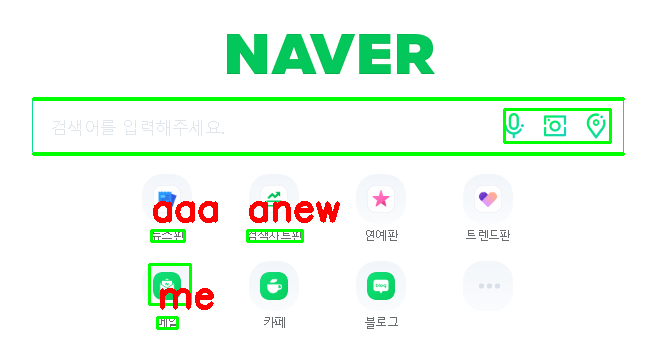

-1

In [40]:
# show the output image
#cv2.imshow("Image", image)'
cv2_imshow(image)
cv2.waitKey(0)